<a href="https://colab.research.google.com/github/ManishKr19/Edureka-Data-Science/blob/main/case_2_logistic_regression_TCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv(r"/content/voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
# EDA ---> 20 min---> graphs/preprocess ---> X-train, X-test---> time: upto 11:56

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
df.shape

(3168, 21)

In [ ]:
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [ ]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


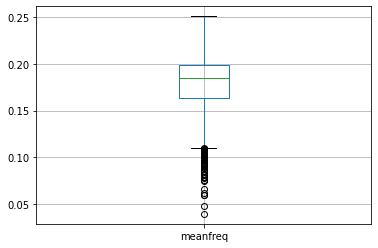

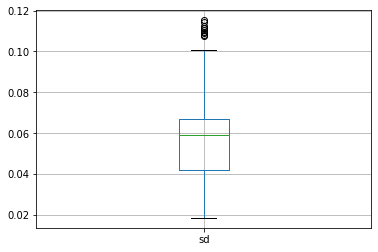

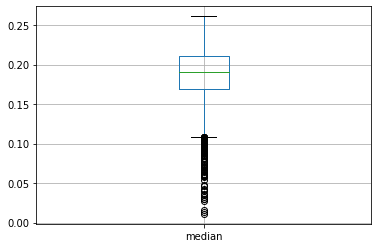

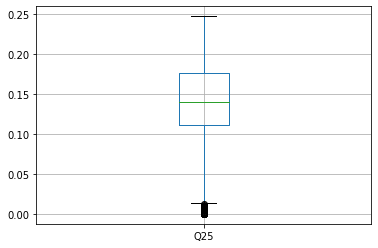

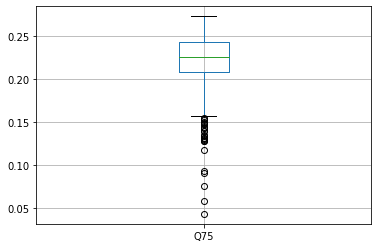

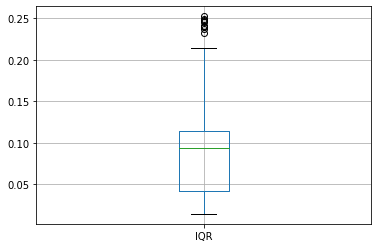

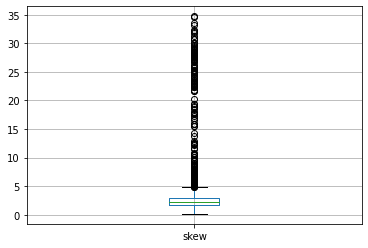

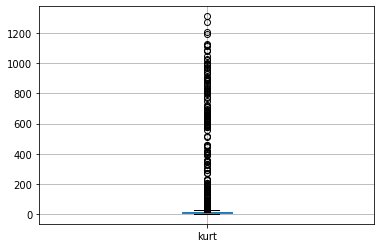

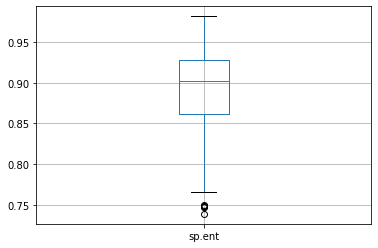

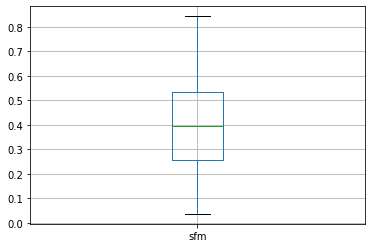

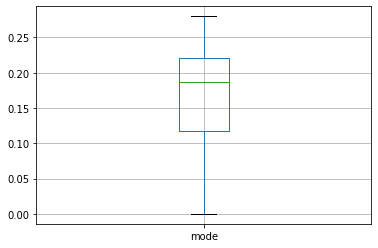

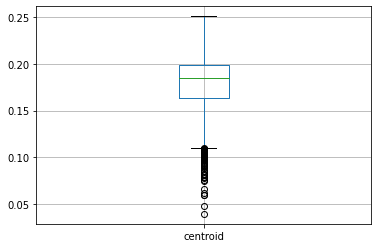

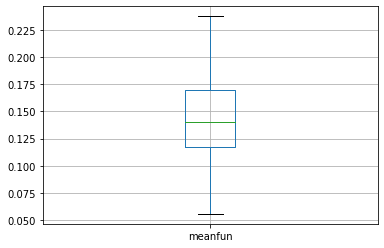

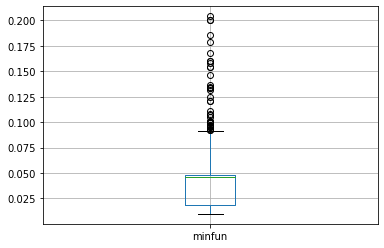

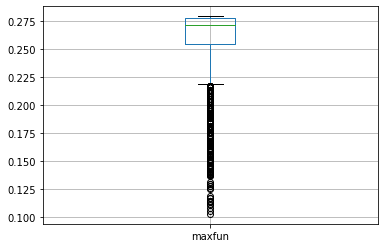

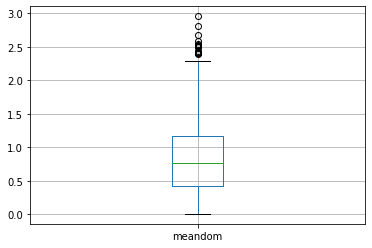

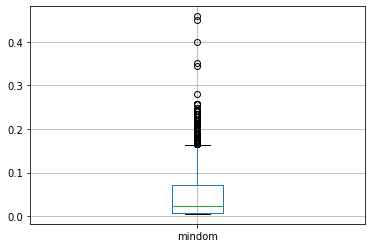

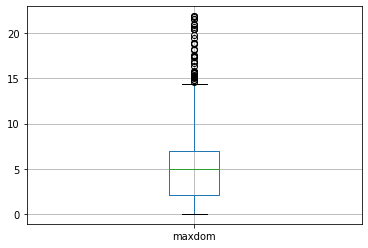

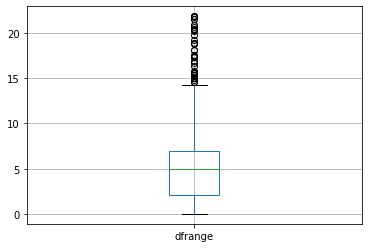

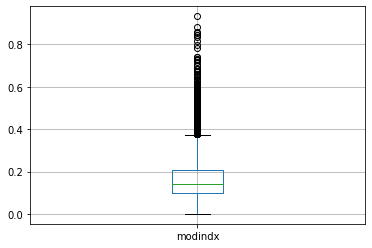

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# subplots, 
df1 = df.select_dtypes(include=numerics)
for column in df1.columns.tolist():
    plt.figure()
    df.boxplot([column])

In [ ]:
# to remove outliers 
# to create a model witout removing outliers ---> 

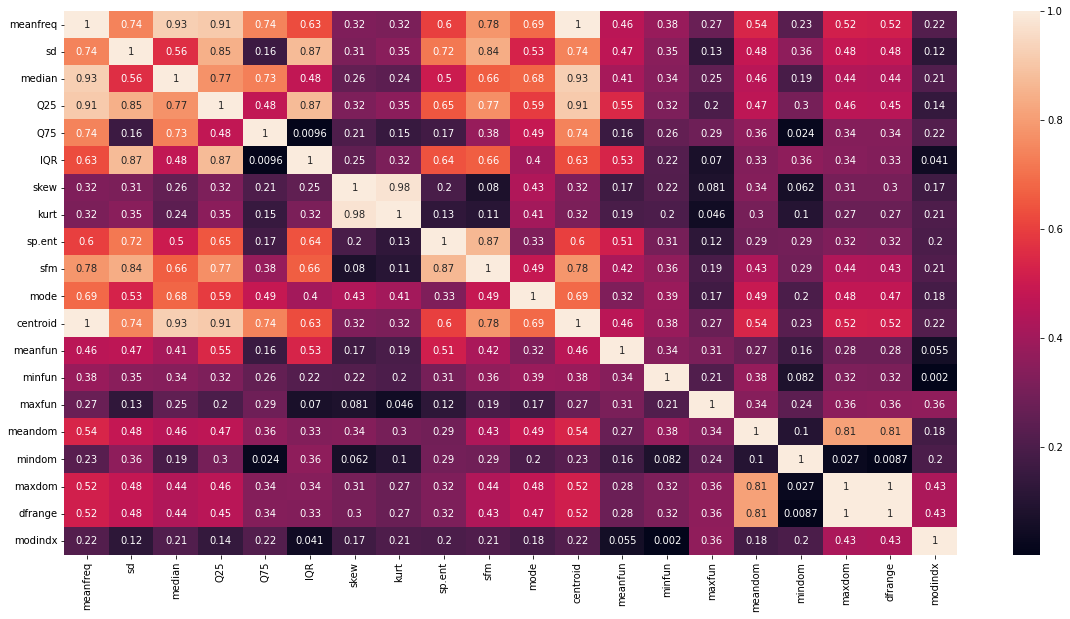

In [ ]:
# lot of numberical data 
# correlation heat map 
# scatter plot 
# histograms 

plt.figure(figsize = (20,10))
sns.heatmap(df.corr().abs(), annot = True)

In [ ]:
# write a code which will extract the index numbers of the column which are highly correlatd 
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop

df.drop(to_drop, axis =1 , inplace = True)

In [ ]:
df.head()

,meanfreq,sd,Q75,IQR,skew,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx,label
0,0.059781,0.064241,0.090193,0.075122,12.863462,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,male
1,0.066009,0.067310,0.092666,0.073252,22.423285,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.052632,male
2,0.077316,0.083829,0.131908,0.123207,30.757155,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.046512,male
3,0.151228,0.072111,0.207955,0.111374,1.232831,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.247119,male
4,0.135120,0.079146,0.206045,0.127325,1.101174,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,0.208274,male


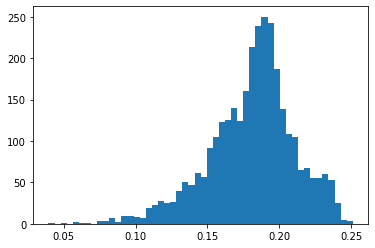

In [ ]:
plt.hist(df['meanfreq'], bins = 50)
plt.show()

# write a code ---> which would make the histograms for all the continuous data

In [ ]:
#  scatter graphs ---> 

In [ ]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [ ]:
df = pd.get_dummies(df)
df.tail()
# write a code ---> map (male= 0 , female =1 )
# y---> ?

,meanfreq,sd,Q75,IQR,skew,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx,label_female,label_male
3163,0.131884,0.084734,0.201144,0.151859,1.762129,0.962934,0.763182,0.200836,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,0.161929,1,0
3164,0.116221,0.089221,0.204911,0.162193,0.693730,0.960716,0.709570,0.013683,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,0.277897,1,0
3165,0.142056,0.095798,0.224360,0.190936,1.876502,0.946854,0.654196,0.008006,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,0.194759,1,0
3166,0.143659,0.090628,0.219943,0.176435,1.591065,0.950436,0.675470,0.212202,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,0.311002,1,0
3167,0.165509,0.092884,0.250827,0.180756,1.705029,0.938829,0.601529,0.267702,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.350000,1,0


In [ ]:
df = df.drop(['label_male'], axis =1)

In [ ]:
df.head()

,meanfreq,sd,Q75,IQR,skew,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx,label_female
0,0.059781,0.064241,0.090193,0.075122,12.863462,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0
1,0.066009,0.067310,0.092666,0.073252,22.423285,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.052632,0
2,0.077316,0.083829,0.131908,0.123207,30.757155,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.046512,0
3,0.151228,0.072111,0.207955,0.111374,1.232831,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.247119,0
4,0.135120,0.079146,0.206045,0.127325,1.101174,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,0.208274,0


In [ ]:
# rename ---> label_femal---> target 

In [ ]:
df = df.rename(columns={'label_female':'target'})

In [ ]:
df.head()

,meanfreq,sd,Q75,IQR,skew,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx,target
0,0.059781,0.064241,0.090193,0.075122,12.863462,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0
1,0.066009,0.067310,0.092666,0.073252,22.423285,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.052632,0
2,0.077316,0.083829,0.131908,0.123207,30.757155,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.046512,0
3,0.151228,0.072111,0.207955,0.111374,1.232831,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.247119,0
4,0.135120,0.079146,0.206045,0.127325,1.101174,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,0.208274,0


In [ ]:
X = df.drop(['target'], axis = 1)
y = df['target']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 68)

In [ ]:
# i will do the coding for logistic regression 

# performance of a classificaiton model ---> tom. 


# package ---> 



# call

log_reg = LogisticRegression(max_iter = 1000)

# fit 

log_reg.fit(X_train, y_train)



# predict 

y_pred_test = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

In [ ]:
print(y_pred_test)

[0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1
 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1
 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0
 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1
 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0
 1 0 1 1 0 0 1 0 1 0 0 0 

In [ ]:
# threshold = 0.5 

# threshold = 0.4 

# I wnt you get the actual value 


print(log_reg.predict_proba(X_test))

#

# either you write your own function ---< 0 0.4===? 0 else 1 

[[0.67797478 0.32202522]
 [0.69990713 0.30009287]
 [0.60929295 0.39070705]
 ...
 [0.57886943 0.42113057]
 [0.65434173 0.34565827]
 [0.10830441 0.89169559]]


In [ ]:
porb_preds = log_reg.predict_proba(X_test)
porb_preds
predictions = []
for x in porb_preds:
    if x[0] > 0.99:
        predictions.append(0)
    else:
        predictions.append(1)

In [ ]:
print(predictions)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
# performance metrics of classificaoiton models 

# sklearn and get the confusion metrics

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

print("true negative:", tn)
print("false positive:", fp)
print("false negative:", fn)
print("true positive:", tp)
# look at the office documentation---> 

true negative: 324
false positive: 9
false negative: 44
true positive: 257


In [ ]:
# please calculate for the test data : recall precision accuracy f1-score 

precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1_score = f1_score(y_test, y_pred_test, average=None)
print('recall  : ', recall, '\nprecisioin  : ', precision, '\nf1_score : ', f1_score) 

recall  :  0.8538205980066446 
precisioin  :  0.9661654135338346 
f1_score :  [0.92439372 0.90652557]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %.3f' % accuracy)

precision = precision_score(y_test, y_pred_test, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred_test, average='binary')
print('Recall: %.3f' % recall)

f1_score = f1_score(y_test, y_pred_test, average='binary')
print('F1-score: %.3f' % f1_score)


Accuracy: 0.916
Precision: 0.966
Recall: 0.854
F1-score: 0.907


In [ ]:
# can you find the same for train data 

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy: %.3f' % accuracy)

precision = precision_score(y_train, y_pred_train, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_train, y_pred_train, average='binary')
print('Recall: %.3f' % recall)

f1_score = f1_score(y_train, y_pred_train, average='binary')
print('F1-score: %.3f' % f1_score)


Accuracy: 0.906
Precision: 0.967
Recall: 0.843
F1-score: 0.900


In [ ]:
print("accuracy of test data:" , (tp+tn)/(tp+tn+fp+fn))
print("recall of test data:" , (tp)/(tp+fn))
recall= (tp)/(tp+fn)
print("precision of test data:" , (tp)/(tp+fp))
precision = (tp)/(tp+fp)
print("f1 score: ", (2*recall*precision/(precision+recall)))

accuracy of test data: 0.916403785488959
recall of test data: 0.8538205980066446
precision of test data: 0.9661654135338346
f1 score:  0.9065255731922398


In [ ]:
# tree bases models 

from sklearn.metrics import classification_report

cr = classification_report(y_train, y_pred_train)

print(cr)



              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1251
           1       0.97      0.84      0.90      1283

    accuracy                           0.91      2534
   macro avg       0.91      0.91      0.91      2534
weighted avg       0.91      0.91      0.91      2534



In [ ]:
# tree bases models 

from sklearn.metrics import classification_report

cr_test = classification_report(y_test, y_pred_test)

print(cr_test)

# assignm,ent , read the official documtnation on classification_report 


              precision    recall  f1-score   support

           0       0.88      0.97      0.92       333
           1       0.97      0.85      0.91       301

    accuracy                           0.92       634
   macro avg       0.92      0.91      0.92       634
weighted avg       0.92      0.92      0.92       634



In [ ]:
#call the fmodel 

dt = DecisionTreeClassifier()

# fit # gini---> entropy 

dt.fit(X_train, y_train)

# predict 

y_pred_test = dt.predict(X_test)

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %.3f' % accuracy)

precision = precision_score(y_test, y_pred_test, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred_test, average='binary')
print('Recall: %.3f' % recall)

f1_score = f1_score(y_test, y_pred_test, average='binary')
print('F1-score: %.3f' % f1_score)


Accuracy: 0.970
Precision: 0.961
Recall: 0.977
F1-score: 0.969


In [ ]:
#call the fmodel 

dt = DecisionTreeClassifier('entropy')

# fit # gini---> entropy 

dt.fit(X_train, y_train)

# predict 

y_pred_test = dt.predict(X_test)

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %.3f' % accuracy)

precision = precision_score(y_test, y_pred_test, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred_test, average='binary')
print('Recall: %.3f' % recall)

f1_score = f1_score(y_test, y_pred_test, average='binary')
print('F1-score: %.3f' % f1_score)


Accuracy: 0.972
Precision: 0.961
Recall: 0.980
F1-score: 0.970


In [ ]:
#graphviz-- > decision tree 

# voice --> randomforest classifier 

#sklearn ---> 

from sklearn.ensemble import RandomForestClassifier


# call 
rf = RandomForestClassifier(n_estimators = 100)
#fit 
rf.fit(X_train, y_train)
#predict 
y_pred_test = rf.predict(X_test)

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %.3f' % accuracy)

precision = precision_score(y_test, y_pred_test, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred_test, average='binary')
print('Recall: %.3f' % recall)

f1_score = f1_score(y_test, y_pred_test, average='binary')
print('F1-score: %.3f' % f1_score)

#12:24 break

Accuracy: 0.984
Precision: 0.980
Recall: 0.987
F1-score: 0.983


In [ ]:
# boosting 

# CAN YOU APPLY boosting using SKLEARN --->

import xgboost
from xgboost import XGBClassifier

In [ ]:
# call 
xgb = XGBClassifier()

#fit 
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_test = xgb.predict(X_test)

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %.3f' % accuracy)

precision = precision_score(y_test, y_pred_test, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred_test, average='binary')
print('Recall: %.3f' % recall)

f1_score = f1_score(y_test, y_pred_test, average='binary')
print('F1-score: %.3f' % f1_score)

#12:24 break

Accuracy: 0.989
Precision: 0.984
Recall: 0.993
F1-score: 0.988


In [ ]:
# apply random search on random forest

from sklearn.model_selection import RandomizedSearchCV

estimator = RandomForestClassifier()
param_distributions = {'n_estimators': [100,500,1000], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2,4,6]}
    
clf = RandomizedSearchCV(estimator,param_distributions, random_state = 40, verbose = 30)
clf.fit(X_train,y_train)

clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=6, criterion=entropy .......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=6, criterion=entropy, score=0.978, total=   5.4s
[CV] n_estimators=1000, min_samples_split=6, criterion=entropy .......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=6, criterion=entropy, score=0.982, total=   5.5s
[CV] n_estimators=1000, min_samples_split=6, criterion=entropy .......


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.9s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=6, criterion=entropy, score=0.976, total=   5.4s
[CV] n_estimators=1000, min_samples_split=6, criterion=entropy .......


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.3s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=6, criterion=entropy, score=0.968, total=   5.4s
[CV] n_estimators=1000, min_samples_split=6, criterion=entropy .......


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.7s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=6, criterion=entropy, score=0.986, total=   5.6s
[CV] n_estimators=100, min_samples_split=2, criterion=gini ...........


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.2s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=2, criterion=gini, score=0.978, total=   0.4s
[CV] n_estimators=100, min_samples_split=2, criterion=gini ...........


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   27.7s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=2, criterion=gini, score=0.984, total=   0.4s
[CV] n_estimators=100, min_samples_split=2, criterion=gini ...........


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   28.1s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=2, criterion=gini, score=0.974, total=   0.5s
[CV] n_estimators=100, min_samples_split=2, criterion=gini ...........


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   28.5s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=2, criterion=gini, score=0.968, total=   0.4s
[CV] n_estimators=100, min_samples_split=2, criterion=gini ...........


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   29.0s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=2, criterion=gini, score=0.986, total=   0.4s
[CV] n_estimators=1000, min_samples_split=2, criterion=entropy .......


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   29.4s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=2, criterion=entropy, score=0.976, total=   5.5s
[CV] n_estimators=1000, min_samples_split=2, criterion=entropy .......


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   34.9s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=2, criterion=entropy, score=0.982, total=   5.5s
[CV] n_estimators=1000, min_samples_split=2, criterion=entropy .......


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   40.4s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=2, criterion=entropy, score=0.976, total=   5.5s
[CV] n_estimators=1000, min_samples_split=2, criterion=entropy .......


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   45.9s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=2, criterion=entropy, score=0.968, total=   5.4s
[CV] n_estimators=1000, min_samples_split=2, criterion=entropy .......


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   51.4s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=2, criterion=entropy, score=0.986, total=   5.6s
[CV] n_estimators=500, min_samples_split=4, criterion=gini ...........


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   57.0s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=4, criterion=gini, score=0.976, total=   2.0s
[CV] n_estimators=500, min_samples_split=4, criterion=gini ...........


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   59.1s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=4, criterion=gini, score=0.980, total=   2.1s
[CV] n_estimators=500, min_samples_split=4, criterion=gini ...........


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  1.0min remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=4, criterion=gini, score=0.978, total=   2.0s
[CV] n_estimators=500, min_samples_split=4, criterion=gini ...........


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.1min remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=4, criterion=gini, score=0.968, total=   2.0s
[CV] n_estimators=500, min_samples_split=4, criterion=gini ...........


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  1.1min remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=4, criterion=gini, score=0.984, total=   2.0s
[CV] n_estimators=100, min_samples_split=6, criterion=entropy ........


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.1min remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=6, criterion=entropy, score=0.974, total=   0.5s
[CV] n_estimators=100, min_samples_split=6, criterion=entropy ........


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  1.1min remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=6, criterion=entropy, score=0.982, total=   0.5s
[CV] n_estimators=100, min_samples_split=6, criterion=entropy ........


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  1.1min remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=6, criterion=entropy, score=0.972, total=   0.6s
[CV] n_estimators=100, min_samples_split=6, criterion=entropy ........


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:  1.1min remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=6, criterion=entropy, score=0.970, total=   0.5s
[CV] n_estimators=100, min_samples_split=6, criterion=entropy ........


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.2min remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=6, criterion=entropy, score=0.982, total=   0.6s
[CV] n_estimators=500, min_samples_split=4, criterion=entropy ........


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.2min remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=4, criterion=entropy, score=0.974, total=   2.8s
[CV] n_estimators=500, min_samples_split=4, criterion=entropy ........


[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:  1.2min remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=4, criterion=entropy, score=0.982, total=   2.8s
[CV] n_estimators=500, min_samples_split=4, criterion=entropy ........


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.3min remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=4, criterion=entropy, score=0.974, total=   2.7s
[CV] n_estimators=500, min_samples_split=4, criterion=entropy ........


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:  1.3min remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=4, criterion=entropy, score=0.968, total=   2.7s
[CV] n_estimators=500, min_samples_split=4, criterion=entropy ........


[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:  1.3min remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=4, criterion=entropy, score=0.986, total=   2.8s
[CV] n_estimators=100, min_samples_split=2, criterion=entropy ........
[CV]  n_estimators=100, min_samples_split=2, criterion=entropy, score=0.976, total=   0.6s
[CV] n_estimators=100, min_samples_split=2, criterion=entropy ........
[CV]  n_estimators=100, min_samples_split=2, criterion=entropy, score=0.982, total=   0.6s
[CV] n_estimators=100, min_samples_split=2, criterion=entropy ........
[CV]  n_estimators=100, min_samples_split=2, criterion=entropy, score=0.976, total=   0.6s
[CV] n_estimators=100, min_samples_split=2, criterion=entropy ........
[CV]  n_estimators=100, min_samples_split=2, criterion=entropy, score=0.968, total=   0.5s
[CV] n_estimators=100, min_samples_split=2, criterion=entropy ........
[CV]  n_estimators=100, min_samples_split=2, criterion=entropy, score=0.986, total=   0.6s
[CV] n_estimators=500, min_samples_split=2, criterion=entropy ........
[CV]  n_estimators=500, min_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished


{'criterion': 'entropy', 'min_samples_split': 6, 'n_estimators': 1000}

In [ ]:
print(clf.best_params_)

{'n_estimators': 500, 'criterion': 'gini'}


In [ ]:
# apply random search on random forest

from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier()
param_distributions = {'n_estimators': [100,500,1000], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2,4,6]}
    
clf = GridSearchCV(estimator,param_distributions, verbose = 30)
clf.fit(X_train,y_train)

clf.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] criterion=gini, min_samples_split=2, n_estimators=100 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, min_samples_split=2, n_estimators=100, score=0.976, total=   0.4s
[CV] criterion=gini, min_samples_split=2, n_estimators=100 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=100, score=0.980, total=   0.4s
[CV] criterion=gini, min_samples_split=2, n_estimators=100 ...........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=100, score=0.976, total=   0.4s
[CV] criterion=gini, min_samples_split=2, n_estimators=100 ...........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=100, score=0.968, total=   0.4s
[CV] criterion=gini, min_samples_split=2, n_estimators=100 ...........


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=100, score=0.978, total=   0.4s
[CV] criterion=gini, min_samples_split=2, n_estimators=500 ...........


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=500, score=0.978, total=   2.1s
[CV] criterion=gini, min_samples_split=2, n_estimators=500 ...........


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.2s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=500, score=0.980, total=   2.1s
[CV] criterion=gini, min_samples_split=2, n_estimators=500 ...........


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.3s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=500, score=0.978, total=   2.1s
[CV] criterion=gini, min_samples_split=2, n_estimators=500 ...........


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.4s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=500, score=0.968, total=   2.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=500 ...........


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.4s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=500, score=0.986, total=   2.1s
[CV] criterion=gini, min_samples_split=2, n_estimators=1000 ..........


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.5s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=1000, score=0.976, total=   4.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=1000 ..........


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   16.5s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=1000, score=0.982, total=   4.1s
[CV] criterion=gini, min_samples_split=2, n_estimators=1000 ..........


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   20.5s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=1000, score=0.978, total=   4.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=1000 ..........


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   24.6s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=1000, score=0.968, total=   4.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=1000 ..........


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   28.5s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=1000, score=0.986, total=   4.1s
[CV] criterion=gini, min_samples_split=4, n_estimators=100 ...........


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   32.6s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=4, n_estimators=100, score=0.976, total=   0.4s
[CV] criterion=gini, min_samples_split=4, n_estimators=100 ...........


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   33.0s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=4, n_estimators=100, score=0.982, total=   0.4s
[CV] criterion=gini, min_samples_split=4, n_estimators=100 ...........


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   33.4s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=4, n_estimators=100, score=0.974, total=   0.4s
[CV] criterion=gini, min_samples_split=4, n_estimators=100 ...........


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   33.9s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=4, n_estimators=100, score=0.966, total=   0.4s
[CV] criterion=gini, min_samples_split=4, n_estimators=100 ...........


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   34.3s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=4, n_estimators=100, score=0.982, total=   0.4s
[CV] criterion=gini, min_samples_split=4, n_estimators=500 ...........


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   34.7s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=4, n_estimators=500, score=0.976, total=   2.0s
[CV] criterion=gini, min_samples_split=4, n_estimators=500 ...........


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   36.7s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=4, n_estimators=500, score=0.980, total=   2.0s
[CV] criterion=gini, min_samples_split=4, n_estimators=500 ...........


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   38.7s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=4, n_estimators=500, score=0.978, total=   2.0s
[CV] criterion=gini, min_samples_split=4, n_estimators=500 ...........


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   40.8s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=4, n_estimators=500, score=0.968, total=   2.0s
[CV] criterion=gini, min_samples_split=4, n_estimators=500 ...........


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   42.8s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=4, n_estimators=500, score=0.986, total=   2.1s
[CV] criterion=gini, min_samples_split=4, n_estimators=1000 ..........


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   44.9s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=4, n_estimators=1000, score=0.976, total=   4.0s
[CV] criterion=gini, min_samples_split=4, n_estimators=1000 ..........


[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   48.9s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=4, n_estimators=1000, score=0.982, total=   4.0s
[CV] criterion=gini, min_samples_split=4, n_estimators=1000 ..........


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   52.9s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=4, n_estimators=1000, score=0.980, total=   4.0s
[CV] criterion=gini, min_samples_split=4, n_estimators=1000 ..........


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   56.9s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=4, n_estimators=1000, score=0.968, total=   3.9s
[CV] criterion=gini, min_samples_split=4, n_estimators=1000 ..........


[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:  1.0min remaining:    0.0s


[CV]  criterion=gini, min_samples_split=4, n_estimators=1000, score=0.986, total=   4.1s
[CV] criterion=gini, min_samples_split=6, n_estimators=100 ...........
[CV]  criterion=gini, min_samples_split=6, n_estimators=100, score=0.978, total=   0.4s
[CV] criterion=gini, min_samples_split=6, n_estimators=100 ...........
[CV]  criterion=gini, min_samples_split=6, n_estimators=100, score=0.982, total=   0.4s
[CV] criterion=gini, min_samples_split=6, n_estimators=100 ...........
[CV]  criterion=gini, min_samples_split=6, n_estimators=100, score=0.970, total=   0.4s
[CV] criterion=gini, min_samples_split=6, n_estimators=100 ...........
[CV]  criterion=gini, min_samples_split=6, n_estimators=100, score=0.968, total=   0.4s
[CV] criterion=gini, min_samples_split=6, n_estimators=100 ...........
[CV]  criterion=gini, min_samples_split=6, n_estimators=100, score=0.984, total=   0.4s
[CV] criterion=gini, min_samples_split=6, n_estimators=500 ...........
[CV]  criterion=gini, min_samples_split=6, n_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  3.8min finished


{'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
# random seearch to decisiion tree with three arguments 

In [ ]:
# apply random search on decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

estimator = DecisionTreeClassifier()
param_distributions = {'max_depth' :[3,5,7], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2,4,6]}
    
clf = RandomizedSearchCV(estimator,param_distributions, random_state = 40, verbose = 30)
clf.fit(X_train,y_train)

clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=6, max_depth=7, criterion=entropy .............
[CV]  min_samples_split=6, max_depth=7, criterion=entropy, score=0.961, total=   0.0s
[CV] min_samples_split=6, max_depth=7, criterion=entropy .............
[CV]  min_samples_split=6, max_depth=7, criterion=entropy, score=0.963, total=   0.0s
[CV] min_samples_split=6, max_depth=7, criterion=entropy .............
[CV]  min_samples_split=6, max_depth=7, criterion=entropy, score=0.949, total=   0.0s
[CV] min_samples_split=6, max_depth=7, criterion=entropy .............
[CV]  min_samples_split=6, max_depth=7, criterion=entropy, score=0.963, total=   0.0s
[CV] min_samples_split=6, max_depth=7, criterion=entropy .............
[CV]  min_samples_split=6, max_depth=7, criterion=entropy, score=0.966, total=   0.0s
[CV] min_samples_split=2, max_depth=3, criterion=gini ................
[CV]  min_samples_split=2, max_depth=3, criterion=gini, score=0.961, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


[CV]  min_samples_split=2, max_depth=3, criterion=gini, score=0.960, total=   0.0s
[CV] min_samples_split=6, max_depth=3, criterion=entropy .............
[CV]  min_samples_split=6, max_depth=3, criterion=entropy, score=0.963, total=   0.0s
[CV] min_samples_split=6, max_depth=3, criterion=entropy .............
[CV]  min_samples_split=6, max_depth=3, criterion=entropy, score=0.966, total=   0.0s
[CV] min_samples_split=6, max_depth=3, criterion=entropy .............
[CV]  min_samples_split=6, max_depth=3, criterion=entropy, score=0.970, total=   0.0s
[CV] min_samples_split=6, max_depth=3, criterion=entropy .............
[CV]  min_samples_split=6, max_depth=3, criterion=entropy, score=0.941, total=   0.0s
[CV] min_samples_split=6, max_depth=3, criterion=entropy .............
[CV]  min_samples_split=6, max_depth=3, criterion=entropy, score=0.957, total=   0.0s
[CV] min_samples_split=4, max_depth=5, criterion=gini ................
[CV]  min_samples_split=4, max_depth=5, criterion=gini, score

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s remaining:    0.0s


[CV]  min_samples_split=2, max_depth=7, criterion=entropy, score=0.961, total=   0.0s
[CV] min_samples_split=2, max_depth=7, criterion=entropy .............
[CV]  min_samples_split=2, max_depth=7, criterion=entropy, score=0.961, total=   0.0s
[CV] min_samples_split=2, max_depth=7, criterion=entropy .............
[CV]  min_samples_split=2, max_depth=7, criterion=entropy, score=0.955, total=   0.0s
[CV] min_samples_split=2, max_depth=7, criterion=entropy .............
[CV]  min_samples_split=2, max_depth=7, criterion=entropy, score=0.961, total=   0.0s
[CV] min_samples_split=2, max_depth=7, criterion=entropy .............
[CV]  min_samples_split=2, max_depth=7, criterion=entropy, score=0.968, total=   0.0s
[CV] min_samples_split=4, max_depth=5, criterion=entropy .............
[CV]  min_samples_split=4, max_depth=5, criterion=entropy, score=0.976, total=   0.0s
[CV] min_samples_split=4, max_depth=5, criterion=entropy .............
[CV]  min_samples_split=4, max_depth=5, criterion=entropy,

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.6s remaining:    0.0s


[CV]  min_samples_split=4, max_depth=5, criterion=entropy, score=0.961, total=   0.0s
[CV] min_samples_split=4, max_depth=5, criterion=entropy .............
[CV]  min_samples_split=4, max_depth=5, criterion=entropy, score=0.966, total=   0.0s
[CV] min_samples_split=4, max_depth=5, criterion=entropy .............
[CV]  min_samples_split=4, max_depth=5, criterion=entropy, score=0.966, total=   0.0s
[CV] min_samples_split=2, max_depth=3, criterion=entropy .............
[CV]  min_samples_split=2, max_depth=3, criterion=entropy, score=0.963, total=   0.0s
[CV] min_samples_split=2, max_depth=3, criterion=entropy .............
[CV]  min_samples_split=2, max_depth=3, criterion=entropy, score=0.966, total=   0.0s
[CV] min_samples_split=2, max_depth=3, criterion=entropy .............
[CV]  min_samples_split=2, max_depth=3, criterion=entropy, score=0.970, total=   0.0s
[CV] min_samples_split=2, max_depth=3, criterion=entropy .............
[CV]  min_samples_split=2, max_depth=3, criterion=entropy,

[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.7s remaining:    0.0s


[CV]  min_samples_split=4, max_depth=3, criterion=entropy, score=0.970, total=   0.0s
[CV] min_samples_split=4, max_depth=3, criterion=entropy .............
[CV]  min_samples_split=4, max_depth=3, criterion=entropy, score=0.941, total=   0.0s
[CV] min_samples_split=4, max_depth=3, criterion=entropy .............
[CV]  min_samples_split=4, max_depth=3, criterion=entropy, score=0.957, total=   0.0s
[CV] min_samples_split=2, max_depth=5, criterion=gini ................
[CV]  min_samples_split=2, max_depth=5, criterion=gini, score=0.963, total=   0.0s
[CV] min_samples_split=2, max_depth=5, criterion=gini ................
[CV]  min_samples_split=2, max_depth=5, criterion=gini, score=0.970, total=   0.0s
[CV] min_samples_split=2, max_depth=5, criterion=gini ................
[CV]  min_samples_split=2, max_depth=5, criterion=gini, score=0.963, total=   0.0s
[CV] min_samples_split=2, max_depth=5, criterion=gini ................
[CV]  min_samples_split=2, max_depth=5, criterion=gini, score=0.951

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 4}

In [ ]:
from sklearn.svm import SVC
#kernels
sv = SVC(kernel='linear')

sv.fit(X_train,y_train)

y_pred_test = sv.predict(X_test)

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %.3f' % accuracy)

precision = precision_score(y_test, y_pred_test, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred_test, average='binary')
print('Recall: %.3f' % recall)

f1_score = f1_score(y_test, y_pred_test, average='binary')
print('F1-score: %.3f' % f1_score)


#Accuracy: 0.984
#Precision: 0.980
#Recall: 0.987
#F1-score: 0.983b

Accuracy: 0.940
Precision: 0.978
Recall: 0.894
F1-score: 0.934


In [ ]:
#3 how strong the tree based models are 

# trial and error # random search / grid search 